In [1]:
import dlib
import cv2
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
predictor_path = "shape_predictor_68_face_landmarks.dat"

In [11]:
def facial_detection(img_path,predictor_path=predictor_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # Load an image
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Iterate over detected faces
    for face in faces:
        # Predict facial landmarks
        landmarks = predictor(gray, face)

        # Extract face region using the bounding box of the detected face
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        face_img = img[y:y+h, x:x+w]

        # Draw landmarks on the face image (optional)
        for point in landmarks.parts():
            cv2.circle(face_img, (point.x - x, point.y - y), 2, (0, 255, 0), -1)

        # return face_img if face_img.ndim > 1 else img
        return face_img.shape
        # plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()


In [5]:
img_path = 'data/Angry/0346f330983a068db0633f96d4a13de873-06-angry.rsquare.w700.jpg'
r = facial_detection(img_path)
print(r)

(151, 150, 3)


In [9]:
img_path = 'data/Angry/shutterstock_80776702_0.jpg'
facial_detection(img_path)
print(r)

None


In [47]:
img_path = 'data/Angry/angry-children.jpg'
# facial_detection(img_path)

print(cv2.imread(img_path).shape)
# r = facial_detection(img_path)
# print(r)

(268, 360, 3)


In [49]:
img_path = 'data/Angry/7-ways-anger-is-ruining-your-health-722x406.jpg'
print(cv2.imread(img_path).shape)
# facial_detection(img_path)

(406, 722, 3)


In [12]:
img_path = 'data/Happy/1_617fd1e2590c2.jpg'
r = facial_detection(img_path)
print(r)

(216, 216, 3)


KeyboardInterrupt: 

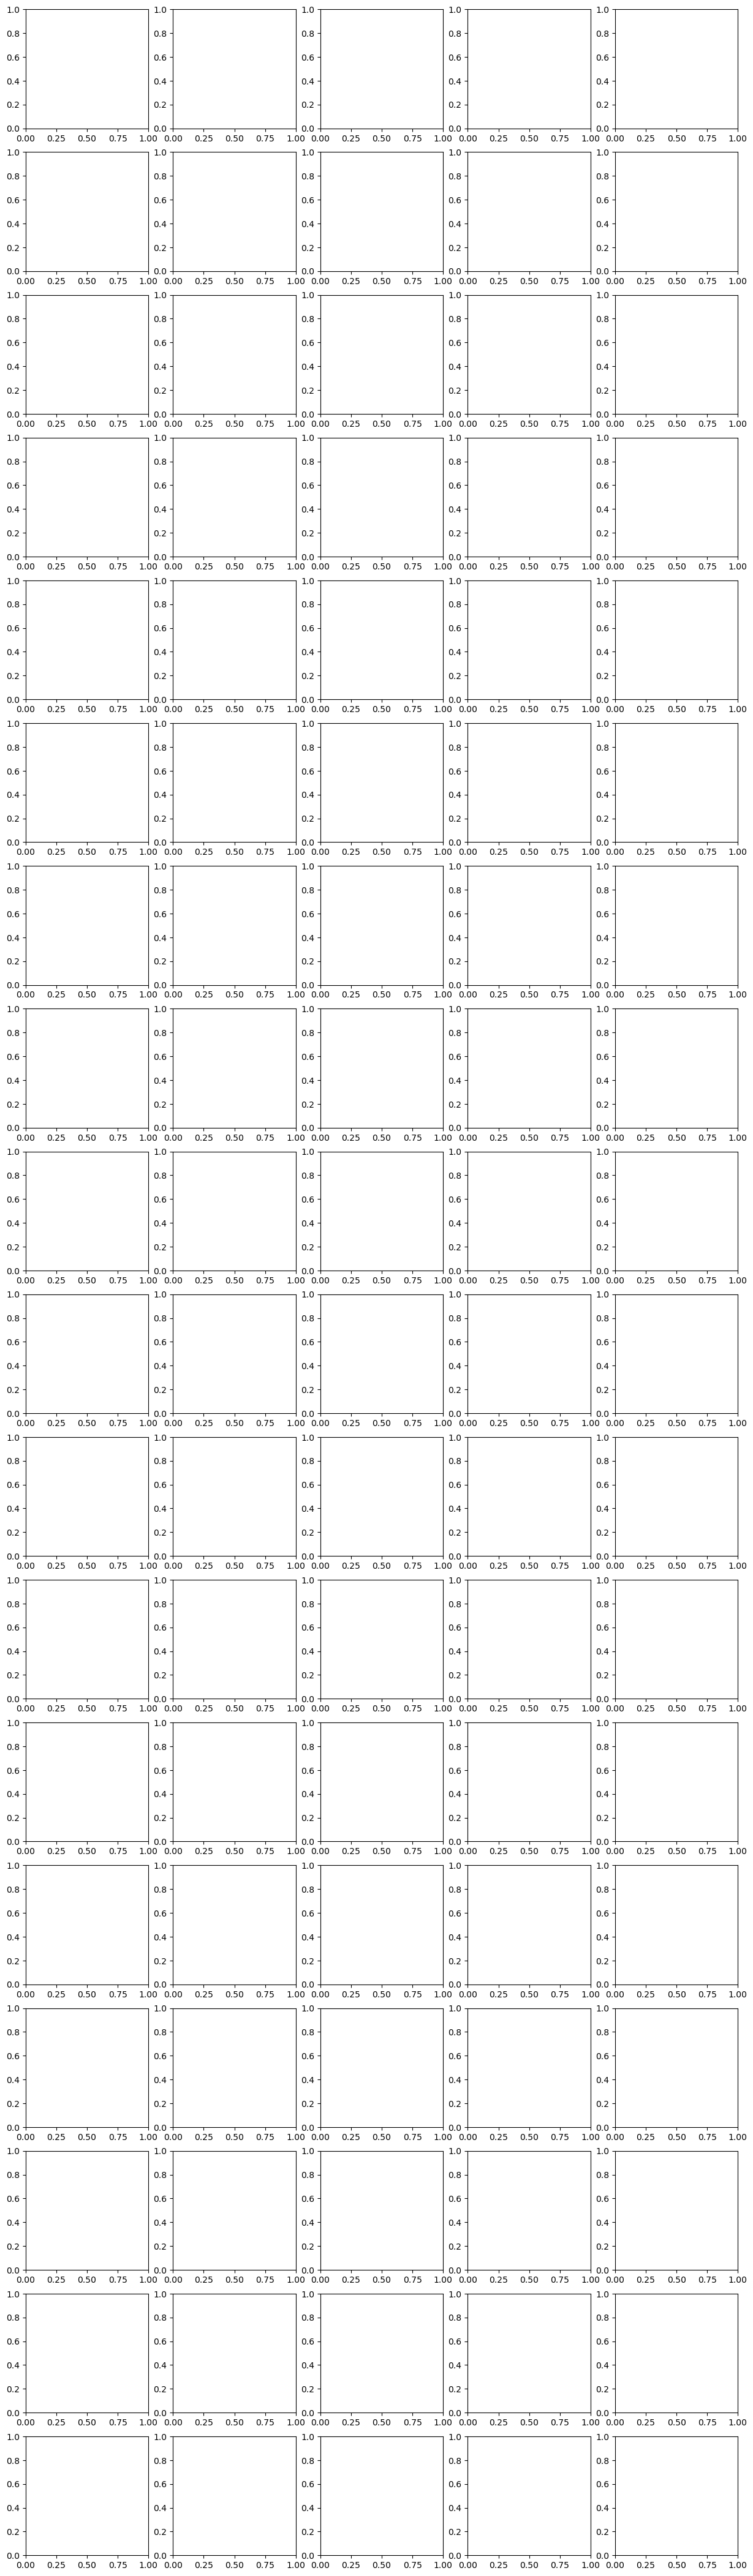

In [4]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the folder containing the images
folder_path = 'data/Angry/'

# Use glob to get a list of all image files in the folder
image_files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))+ glob.glob(os.path.join(folder_path, '*.jpeg'))

# Set the number of images to display in each row
images_per_row = 5

# Calculate the number of rows
num_rows = len(image_files) // images_per_row + (len(image_files) % images_per_row > 0)

# Create a subplot for each row
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 3*num_rows))

# Flatten the axs array in case we have only one row
axs = axs.flatten()
n = 0
# Iterate through the list of image files and display them in the subplot
for i, image_file in enumerate(image_files):
    n +=1
    facial_detection(image_file)
    # ax = axs[i]
    # ax.axis('off')  # Turn off axis labels

    # try:
    #     # Display the image using PIL
    #     img = Image.open(image_file)
    #     ax.imshow(img)
    # except Exception as e:
    #     print(f"Error reading {image_file}: {e}")
print(n)
# Adjust layout and show the plot
# plt.tight_layout()
# plt.show()
